# TP 3: Análisis Descriptivo y Predicción de Desocupación
##### Fecha de entrega: 15 de noviembre de 2024
##### Profesor: Walter Sosa Escudero, Tomás Pachecon

La Encuesta Permanente de Hogares (EPH) es un programa nacional de producción sistemática y permanente de indicadores sociales que lleva a cabo el Instituto Nacional de 
Estadística y Censos (INDEC), que permite conocer las características sociodemográfica 
y socioeconómicas de la población. Uno de los indicadores mas valiosos sobre el merca o
laboral que pueden obtenerse con los datos de esta encuesta es la tasa de desocupacióndas.

### Ejercicio 1
Utilizando información disponible en la pagina del INDEC, expliquen brevemente como se identifica a las personas desocupadas.

     -------------------------------------- 294.9/294.9 KB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\De Boeck Inc\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### Ejercicio 2
Entren a la pagina y vayan a la sección Servicios y 
Herramientas ->Bases de datos. Descarguen la base de microdatos de la Encuest 
Permanente de Hogares (EPH) correspondiente al primer trimestre de 2004 y 20 4
en formato .dta y .xls, respectivamente (una vez descargadas, las bases a usar deberán llamarse individual_T104.dta y usu_individual_T124.xls). En la pag na
web, también encontrará un diccionario de variables con el nombre de “Diseñ  de
registro y estructura para las bases preliminares (hogares y personas)”. Desca guen
el diccionario de cada año. En estos archivos se les indica qué significa cada va iable
que aparece en la base de datos, en particular, en la sección de Diseño de re istros
de la base Personas.

#### Parte A
Cada grupo va a trabajar con un aglomerado distinto (nosotros somos grupo 8 - Tucumán). Quédense con las observaciones correspondientes a su aglomerado y unan ambos trimestres en una sola base.

In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

#Parte A

# Para comenzar, definimos la carpeta
carpeta = "C:/Users/De Boeck Inc/Documents/Big Data/TP 3/Bases"

# Definimos los nombres de los archivos
archivo_dta = "individual_T104.dta"
archivo_xls = "usu_individual_T124.xlsx"

# Cargamos el archivo .dta, que es la base del 2004
datos_dta = pd.read_stata(os.path.join(carpeta, archivo_dta))

# Cargamos el archivo .xls, que es la base del 2024
datos_xls = pd.read_excel(os.path.join(carpeta, archivo_xls))

# En primer lugar, vamos a solucionar un problema de codificación de los datos, lo cual nos facilitará la realización de todos los ejercicios en el futuro. 
# Establecemos el diccionario de mapeos para cada columna (ajustado según los valores exactos), según como aparecen en la base del 2004
mapeos = {
    'ch03': {'Jefe': 1, 'Cónyuge/Pareja': 2, 'Hijo/Hijastro': 3, 'Yerno/Nuera': 4, 'Nieto': 5, 'Madre/Padre': 6, 'Suegro': 7, 'Hermano': 8, 'Otros familiares': 9, 'No familiares': 10},
    'ch04': {'Varón': 1, 'Mujer': 2},
    'ch06': {'Menos de 1 año': 0, '98 y más años': 99},
    'ch07': {'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3, 'Viudo': 4, 'Soltero': 5, 'Ns./Nr.': 9},
    'ch08': {'Obra social (incluye PAMI)': 1, 'Mutual/Prepaga/Servicio de emergencia': 2, 'Planes y seguros públicos': 3, 'No paga ni le descuentan': 4, 'Ns./Nr.': 9, 'Obra social y mutual/prepaga/servicio de emergencia': 1, 'Obra social y planes y seguros públicos': 1, 'Obra social, mutual/prepaga/servicio de emergencia y planes': 1, 'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 2},
    'ch09': {'Sí': 1, 'No': 2, 'Menor de 2 años': 3, 'Ns./Nr.': 9 },
    'ch10': {'Sí, asiste': 1, 'No asiste, pero asistió': 2, 'Nunca asistió': 3, 'Ns./Nr.': 9},
    'ch11': {'Público': 1, 'Privado': 2, 'Ns./Nr.': 9},
    'ch12': {'Jardín/Preescolar': 1, 'Primario': 2, 'EGB': 3, 'Secundario': 4, 'Polimodal': 5, 'Terciario': 6, 'Universitario': 7, 'Posgrado Universitario': 8, 'Ns./Nr.': 0, 'Educación especial (discapacitado)': 9},
    'ch13': {'Sí': 1, 'No': 2, 'Ns./Nr.': 9},
    'ch14': {'Ninguno': 0, 'Primero': 1, 'Segundo': 2, 'Tercero': 3, 'Cuarto': 4, 'Quinto': 5, 'Sexto': 6, 'Séptimo': 7, 'Octavo': 8, 'Noveno': 9},
    'nivel_ed': {'Primaria Incompleta (incluye educación especial)': 1, 'Primaria Completa': 2, 'Secundaria Incompleta': 3, 'Secundaria Completa': 4, 'Superior Universitaria Incompleta': 5, 'Superior Universitaria Completa': 6, 'Sin instrucción': 7, 'Ns./Nr.': 9},
    'estado': {'Entrevista individual no realizada (no respuesta al cuestion': 0, 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años': 4},
    'cat_ocup': {'Patrón': 1, 'Cuenta propia': 2, 'Obrero o empleado': 3, 'Trabajador familiar sin remuneración': 4, 'Ns./Nr.': 9},
    'cat_inac': {'Jubilado/pensionado':1 ,'Rentista':2, 'Estudiante':3,'Ama de casa':4,  'Menor de 6 años':5, 'Discapacitado':6, 'Otros':7},

}
# Aplicar mapeos condicionalmente con .apply
for col, mapeo in mapeos.items():
    datos_dta[col] = datos_dta[col].apply(lambda x: mapeo.get(x, x))  # Si no encuentra el valor, deja el original

# Verificamos de los cambios queden realizados en la base de datos completa. 
for col in mapeos.keys():
    print(datos_dta[col].unique())
    print()

# Filtramos el DataFrame para quedarse solo con el aglomerado "Gran Tucumán - Tafí Viejo"
datos_tucuman04 = datos_dta[datos_dta['aglomerado'] == "Gran Tucumán - Tafí Viejo"]
datos_tucuman24 = datos_xls[datos_xls["AGLOMERADO"]== 29 ]

#Ahora, para unificar las bases de datos, vemos cuales son las columnas que tenemos en cada base, para que coincidan, haremos que se modifiquen y queden todas en mayúscula. 
datos_tucuman04.columns = datos_tucuman04.columns.str.upper()
datos_tucuman24.columns = datos_tucuman24.columns.str.upper()

# Creamos un nuevo objeto, en donde buscamos cuales son las columnas comunes en ambas bases, haciendo la unión.
columnas_comunes = set(datos_tucuman04.columns).union(set(datos_tucuman24.columns))

# Reindexar ambos DataFrames para tener las mismas columnas (y en el mismo orden)
datos_tucuman04 = datos_tucuman04.reindex(columns=columnas_comunes)
datos_tucuman24 = datos_tucuman24.reindex(columns=columnas_comunes)

# Concatenamos los DataFrames apilando uno debajo del otro
datos_panel = pd.concat([datos_tucuman04, datos_tucuman24], axis=0)

#Las volvemos a poner en el orden original para que sea mas sencilla su lectura
orden_columnas = datos_xls.columns
datos_panel = datos_panel[orden_columnas]

[1, 2, 3, 6, 9, 8, 7, 5, 10, 4]
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

[1, 2]
Categories (2, int64): [1 < 2]

[79.0, 67.0, 74.0, 54.0, 51.0, ..., 88.0, 99.0, 91.0, 97.0, 95.0]
Length: 99
Categories (99, float64): [0.0 < 1.0 < 2.0 < 3.0 ... 95.0 < 96.0 < 97.0 < 99.0]

[4, 3, 2, 5, 1, 9]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 9]

[1 4 2 3 9]

[1, 2, 3, 9]
Categories (4, int64): [1 < 2 < 3 < 9]

[2.0, 1.0, 3.0, 0.0, 9.0]
Categories (5, float64): [0.0 < 1.0 < 2.0 < 3.0 < 9.0]

[0.0, 1.0, 2.0, 9.0]
Categories (4, float64): [0.0 < 1.0 < 2.0 < 9.0]

[4. 2. 7. 6. 0. 1. 5. 3. 9. 8.]

[2.0, 1.0, 0.0, 9.0]
Categories (4, float64): [0.0 < 1.0 < 2.0 < 9.0]

['03' '  ' '04' '02' '01' '06' '00' '05' '07' '09' '99' '08' '98']

[3, 2, 6, 5, 4, 1, 7]
Categories (7, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7]

[3, 1, 2, 4, 0]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

[0.0, 2.0, 4.0, 3.0, 1.0]
Categories (5, float64): [0.0 < 1.0 < 2.0 < 3.0 < 4.0]

[1.0, 0.0, 4.0, 3.0, 5.0, 2.0, 7.0, 6

C:\Users\De Boeck Inc\AppData\Local\Temp\ipykernel_19232\3160878214.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  datos_panel = pd.concat([datos_tucuman04, datos_tucuman24], axis=0)
C:\Users\De Boeck Inc\AppData\Local\Temp\ipykernel_19232\3160878214.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  datos_panel = pd.concat([datos_tucuman04, datos_tucuman24], axis=0)
C:\Users\De Boeck Inc\AppData\Local\Temp\ipykernel_19232\3160878214.py:66: FutureWarning: The behavior of DataFrame concat

#### Parte B 
Si hay observaciones con valores que no tienen sentido, descártenlas (por ejemplo, ingresos y edades negativos). Expliquen las decisiones tomadas.

In [13]:
# Parte B
# Primero lo que queremos observar, es un resumen de todos los resultados, para evaluar si existen datos que no tienen sentido, y por tanto se deben descartar. 
# Creamos una lista para almacenar los resultados
resultados = []

# Iterar por cada columna y obtener los valores únicos y su frecuencia
for columna in datos_panel.columns:
    conteo = datos_panel[columna].value_counts(dropna=False)  # Incluye NaN si hay
    for valor, frecuencia in conteo.items():
        resultados.append({
            'Variable': columna,
            'Valor': valor,
            'Frecuencia': frecuencia
        })

# Convertir la lista de resultados en un DataFrame
resumen_df = pd.DataFrame(resultados)

#De este resumen aprendimos todos los valores dados en cada variable, y los comparamos con los valores esperados en el resumen otorgado por el indec. 
#Cabe destacar, que aunque no se detalla en dicho resumen, encontramos varios "0" en variables como H15, CH10, y CH11, entre otros, cuando no es una variable identificada. Asumimos que es una ausencia de la observación. 

# Ahora, eliminaremos los valores que no tienen sentido en los ingresos y los salarios. En estos dos casos, eliminaremos cualquier valor que sea negativo, conservando las ausencias de observaciones. 
# Definimos las columnas de ingreso y la columna de edad
columnas_ingreso = ['PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3']

# Convertimos columnas de ingreso y edad a formato numérico, forzando errores a NaN
datos_panel['CH06'] = pd.to_numeric(datos_panel['CH06'], errors='coerce')
for columna in columnas_ingreso:
    datos_panel[columna] = pd.to_numeric(datos_panel[columna], errors='coerce')

# Creamos un filtro para asegurar que todos los montos de ingreso y edad sean no negativos o NaN
filtro = (datos_panel['CH06'] >= 0) | (datos_panel['CH06'].isna())
for columna in columnas_ingreso:
    filtro &= (datos_panel[columna] >= 0) | (datos_panel[columna].isna())

# Aplicamos el filtro al DataFrame completo
datos_panel_limpio = datos_panel[filtro]

C:\Users\De Boeck Inc\AppData\Local\Temp\ipykernel_19232\2258528900.py:8: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  conteo = datos_panel[columna].value_counts(dropna=False)  # Incluye NaN si hay


#### Parte C
Una vez hecha esa limpieza, realicen un gráfico de barras mostrando la composición por sexo para 2004 y 2024. Comenten los resultados

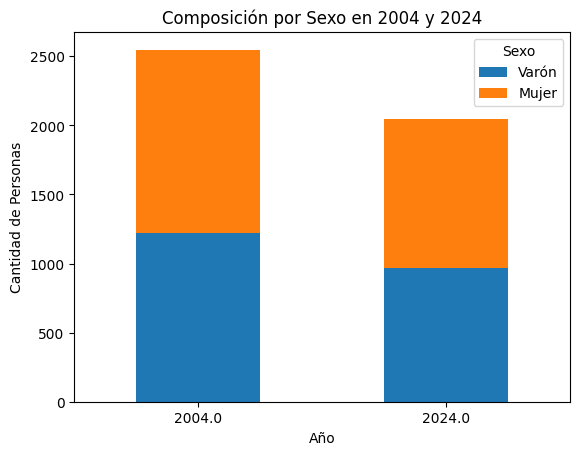

In [14]:
#Parte C

# Contar la cantidad de personas por año y sexo
conteo_sexo = datos_panel_limpio.groupby(['ANO4', 'CH04']).size().unstack()

# Crear el gráfico de barras
conteo_sexo.plot(kind='bar', stacked=True)
plt.title("Composición por Sexo en 2004 y 2024")
plt.xlabel("Año")
plt.ylabel("Cantidad de Personas")
plt.legend(["Varón", "Mujer"], title="Sexo")
plt.xticks(rotation=0)
plt.show()

#Lo que podemos observar de este gráfico, es que si bien la proporción de sexos se mantuvo medianamente constante en el tiempo, disminuyeron la cantidad de personas encuestadas para esta región entre el 2004 y el 2024.


#### Parte D
Realicen una matriz de correlación para 2004 y 2024 con las siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF. Utilicen alguno de los comandos disponibles en este link o este link para graficar la matriz de correlación. Comenten los resultados.

Matriz de correlación para 2004:
              CH04      CH06      CH07      CH08  NIVEL_ED    ESTADO  \
CH04      1.000000  0.063482 -0.000920 -0.019508  0.011305  0.093189   
CH06      0.063482  1.000000 -0.556241 -0.252051 -0.211726 -0.443048   
CH07     -0.000920 -0.556241  1.000000  0.097332  0.097615  0.487961   
CH08     -0.019508 -0.252051  0.097332  1.000000 -0.104066 -0.005927   
NIVEL_ED  0.011305 -0.211726  0.097615 -0.104066  1.000000  0.078695   
ESTADO    0.093189 -0.443048  0.487961 -0.005927  0.078695  1.000000   
CAT_INAC  0.116209 -0.416350  0.369422  0.039409  0.161615  0.845402   
IPCF      0.003266  0.191942 -0.069239 -0.354991  0.182627 -0.131921   

          CAT_INAC      IPCF  
CH04      0.116209  0.003266  
CH06     -0.416350  0.191942  
CH07      0.369422 -0.069239  
CH08      0.039409 -0.354991  
NIVEL_ED  0.161615  0.182627  
ESTADO    0.845402 -0.131921  
CAT_INAC  1.000000 -0.138239  
IPCF     -0.138239  1.000000  

Matriz de correlación para 2024:
     

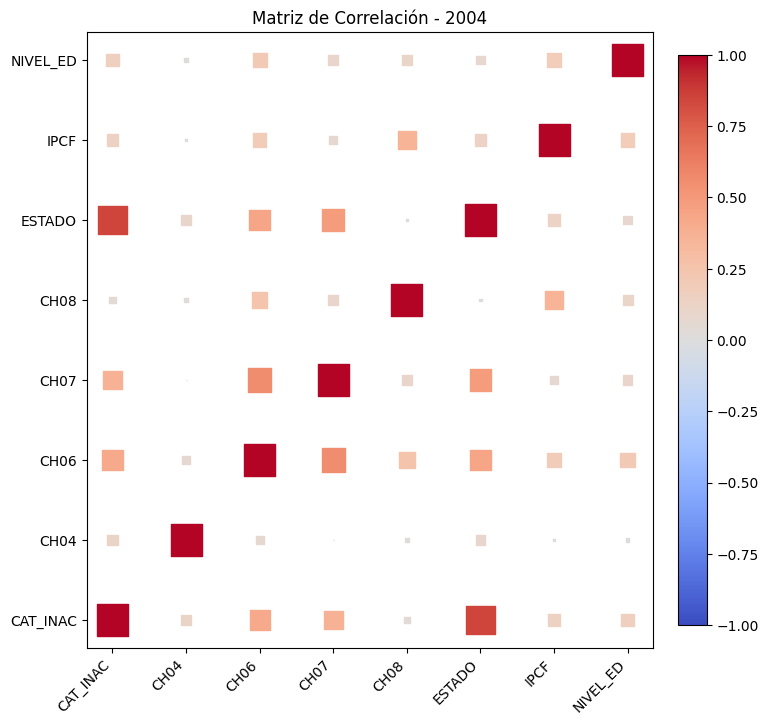

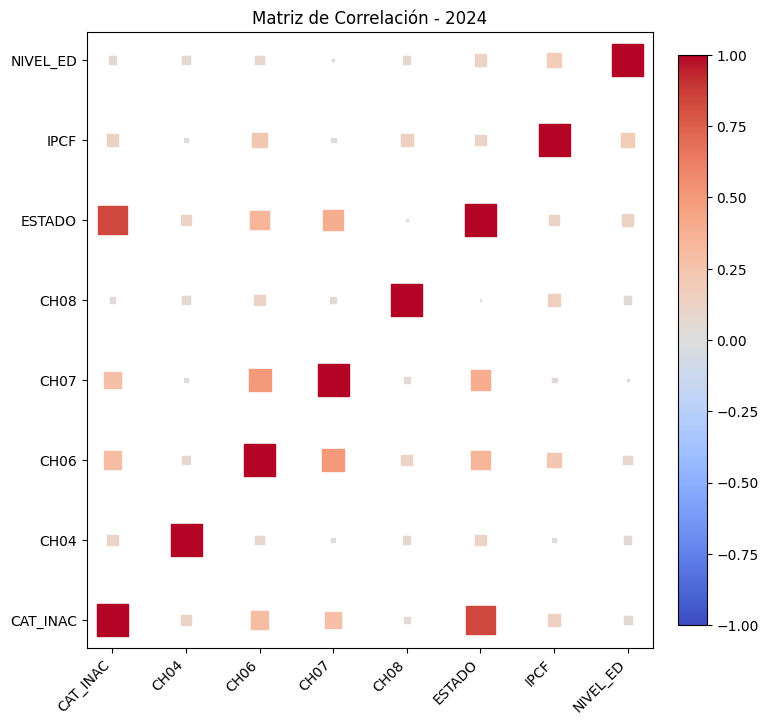

In [15]:
#Parte D 
variables_interes = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']


# Filtrar los datos de 2004 y 2024
datos_2004 = datos_tucuman04[variables_interes]
datos_2024 = datos_tucuman24[variables_interes]

# Calcular la matriz de correlación para 2004
corr_2004 = datos_2004.corr()

# Calcular la matriz de correlación para 2024
corr_2024 = datos_2024.corr()

# Mostrar las matrices de correlación
print("Matriz de correlación para 2004:")
print(corr_2004)
print("\nMatriz de correlación para 2024:")
print(corr_2024)

#Utilizamos como base el link propuesto en la consigna, y realizamos dos heatmaps para ver las correlaciones 

def heatmap(x, y, size, title):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Obtener etiquetas de los ejes
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]: p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]: p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500  # Ajuste de tamaño para los cuadrados
    ax.scatter(
        x=x.map(x_to_num),  # Mapea los nombres en x a números
        y=y.map(y_to_num),  # Mapea los nombres en y a números
        s=size * size_scale,  # Escala del tamaño del cuadrado
        marker='s',  # Forma de cuadrado
        c=size,  # Color basado en el valor de correlación
        cmap="coolwarm",  # Paleta de colores para diferenciar valores
        vmin=-1, vmax=1  # Escala de color de -1 a 1
    )
    
    # Etiquetas en los ejes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    # Agregar título y barra de color
    plt.colorbar(ax.collections[0], ax=ax, orientation="vertical", fraction=0.046, pad=0.04)
    ax.set_title(title)

# Preparar los datos para el gráfico de dispersión con cuadrados para cada año
def prepare_corr_data(corr_matrix):
    corr = corr_matrix.reset_index().melt(id_vars='index')  # Transformar en formato largo
    corr.columns = ['x', 'y', 'value']
    return corr

corr_data_2004 = prepare_corr_data(corr_2004)
corr_data_2024 = prepare_corr_data(corr_2024)

# Crear gráficos para 2004 y 2024
heatmap(corr_data_2004['x'], corr_data_2004['y'], corr_data_2004['value'].abs(), "Matriz de Correlación - 2004")
heatmap(corr_data_2024['x'], corr_data_2024['y'], corr_data_2024['value'].abs(), "Matriz de Correlación - 2024")

plt.show()


#### Parte E
¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos? ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)?


In [16]:
#Parte E

# Contar desocupados e inactivos en la base de datos
desocupados = datos_panel_limpio[datos_panel_limpio['ESTADO'] == 2].shape[0]
inactivos = datos_panel_limpio[datos_panel_limpio['ESTADO'] == 3].shape[0]

print("En total hay", desocupados, "desocupados en la muestra")
print("En total hay", inactivos, "inactivos en la muestra")


# Calcular la media del ingreso per cápita familiar (IPCF) según estado
media_ingreso_xestado = datos_panel_limpio.groupby('ESTADO')['IPCF'].mean().round(2)

print("Media del ingreso según estado:")
print(media_ingreso_xestado)


En total hay 259 desocupados en la muestra
En total hay 1842 inactivos en la muestra
Media del ingreso según estado:
ESTADO
0      127.43
1    79658.15
2    31834.56
3    60272.54
4    32075.06
Name: IPCF, dtype: float64


### Ejercicio 3
Uno de los grandes problemas de la EPH es la creciente cantidad de hogares que no 
reportan sus ingresos (ver por ejemplo el siguiente informe). ¿Cuántas personas n 
respondieron cual es su condición de actividad? Guarden como una base distin a
llamada respondieron las observaciones do de respondieron la pregunta sobre su
condición de actividad (ESTADO). Las observaciones con ESTADO=0 guárdenla  en
una base bajo el nombre norespondieron

In [17]:
#Ejercicio 3

# Filtramos las observaciones donde sí respondieron (ESTADO ≠ 0)
respondieron = datos_panel_limpio[datos_panel_limpio['ESTADO'] != 0]

# Filtramos las observaciones donde no respondieron (ESTADO = 0)
norespondieron = datos_panel_limpio[datos_panel_limpio['ESTADO'] == 0]

# Contamos la cantidad de personas que no respondieron la condición de actividad
cantidad_norespondieron = norespondieron.shape[0]
print("Cantidad de personas que no respondieron su condición de actividad:", cantidad_norespondieron)


Cantidad de personas que no respondieron su condición de actividad: 10


### Ejercicio 4

Agreguen a la base respondieron una columna llamada PEA (Población Económicamente Activa) que tome 1 si están ocupados o desocupados en ESTADO. Realicen
un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados.

C:\Users\De Boeck Inc\AppData\Local\Temp\ipykernel_19232\3493779473.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  datos_panel_limpio['PEA'] = datos_panel_limpio['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)
C:\Users\De Boeck Inc\AppData\Local\Temp\ipykernel_19232\3493779473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_panel_limpio['PEA'] = datos_panel_limpio['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)


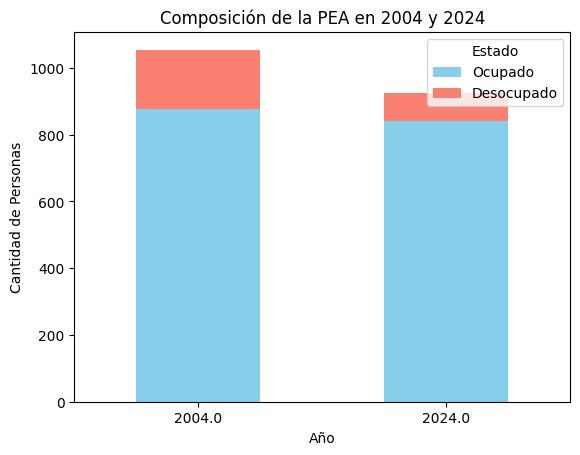

In [20]:


# Crear la columna PEA donde toma 1 si están ocupados (1) o desocupados (2) en ESTADO
datos_panel_limpio['PEA'] = datos_panel_limpio['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)

# Contar la cantidad de personas en la PEA por año y estado de ocupación
conteo_pea = datos_panel_limpio[datos_panel_limpio['PEA'] == 1].groupby(['ANO4', 'ESTADO']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas para mostrar la composición de la PEA en 2004 y 2024
conteo_pea.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title("Composición de la PEA en 2004 y 2024")
plt.xlabel("Año")
plt.ylabel("Cantidad de Personas")
plt.legend(["Ocupado", "Desocupado"], title="Estado")
plt.xticks(rotation=0)
plt.show()

### Ejercicio 5

Agreguen a la base respondieron una columna llamada PET (Población en Edad
para Trabajar) que tome 1 si están la persona tiene entre 15 y 65 años cumplidos.Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024.
Comenten los resultados y compare PET con PEA.

C:\Users\De Boeck Inc\AppData\Local\Temp\ipykernel_19232\3518877199.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  datos_panel_limpio['PET'] = datos_panel_limpio['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)
C:\Users\De Boeck Inc\AppData\Local\Temp\ipykernel_19232\3518877199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_panel_limpio['PET'] = datos_panel_limpio['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)


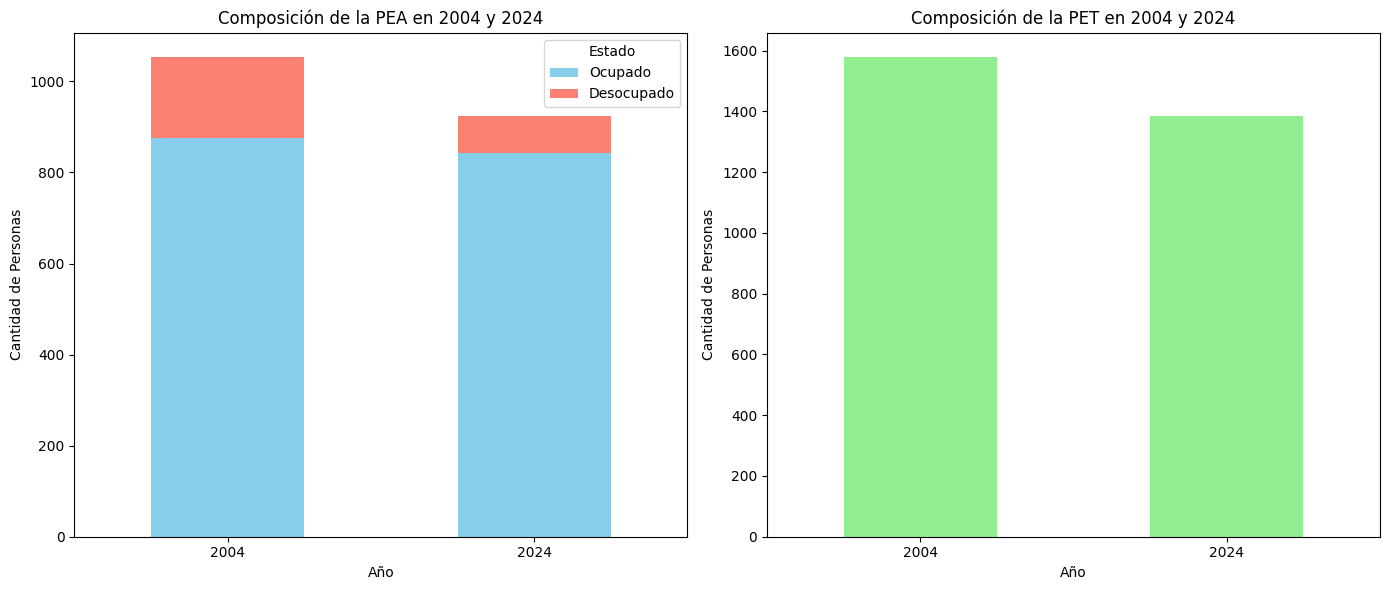

In [21]:
# Crear la columna PET donde toma 1 si la edad de la persona está entre 15 y 65 años
datos_panel_limpio['PET'] = datos_panel_limpio['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

# Contar la cantidad de personas en la PET por año (sin diferenciar por ocupación)
conteo_pet = datos_panel_limpio[datos_panel_limpio['PET'] == 1].groupby(['ANO4']).size()

# Crear gráficos
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de la PEA
conteo_pea.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=ax[0])
ax[0].set_title("Composición de la PEA en 2004 y 2024")
ax[0].set_xlabel("Año")
ax[0].set_ylabel("Cantidad de Personas")
ax[0].legend(["Ocupado", "Desocupado"], title="Estado")
ax[0].set_xticklabels(['2004', '2024'], rotation=0)

# Gráfico de la PET
conteo_pet.plot(kind='bar', color='lightgreen', ax=ax[1])
ax[1].set_title("Composición de la PET en 2004 y 2024")
ax[1].set_xlabel("Año")
ax[1].set_ylabel("Cantidad de Personas")
ax[1].set_xticklabels(['2004', '2024'], rotation=0)

plt.tight_layout()
plt.show()

### Ejercicio 6

Por último, agreguen la base respondieron una columna llamada desocupado que
tome 1 si esta desocupada. ¿Cuántas personas están desocupadas en 2004 vs 2024?

In [22]:
# Crear la columna DESOCUPADO donde toma 1 si la persona está desocupada (ESTADO == 2)
datos_panel_limpio['DESOCUPADO'] = datos_panel_limpio['ESTADO'].apply(lambda x: 1 if x == 2 else 0)

# Contar la cantidad de personas desocupadas por año
conteo_desocupados = datos_panel_limpio[datos_panel_limpio['DESOCUPADO'] == 1].groupby('ANO4').size()

# Mostrar el conteo de desocupados por año
print("Cantidad de personas desocupadas en 2004 vs 2024:\n", conteo_desocupados)

Cantidad de personas desocupadas en 2004 vs 2024:
 ANO4
2004.0    178
2024.0     81
dtype: int64


C:\Users\De Boeck Inc\AppData\Local\Temp\ipykernel_19232\36958990.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  datos_panel_limpio['DESOCUPADO'] = datos_panel_limpio['ESTADO'].apply(lambda x: 1 if x == 2 else 0)
C:\Users\De Boeck Inc\AppData\Local\Temp\ipykernel_19232\36958990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_panel_limpio['DESOCUPADO'] = datos_panel_limpio['ESTADO'].apply(lambda x: 1 if x == 2 else 0)


a- Muestre la proporción de desocupados por nivel educativo comparando 2004
vs 2024. ¿Hubo cambios de desocupados por nivel educativo?

In [25]:
# Calcular el total de personas y desocupados por año y nivel educativo
total_por_nivel = datos_panel_limpio.groupby(['ANO4', 'NIVEL_ED']).size()
desocupados_por_nivel = datos_panel_limpio[datos_panel_limpio['DESOCUPADO'] == 1].groupby(['ANO4', 'NIVEL_ED']).size()

# Calcular la proporción de desocupados por nivel educativo
proporcion_desocupados = (desocupados_por_nivel / total_por_nivel * 100).unstack()

# Mostrar los resultados
print("Proporción de desocupados por nivel educativo en 2004 vs 2024:\n", proporcion_desocupados)

Proporción de desocupados por nivel educativo en 2004 vs 2024:
 NIVEL_ED         1         2         3          4          5         6  \
ANO4                                                                     
2004.0    2.097902  7.608696  6.683168  14.122137  17.171717  5.369128   
2024.0    0.699301  3.546099  4.048583   6.701031   5.102041  4.324324   

NIVEL_ED         7  
ANO4                
2004.0    0.321543  
2024.0         NaN  


b - Cree una variable categórica de años cumplidos (CH06) agrupada de a 10 años.
Muestre proporción de desocupados por edad agrupada comparando 2004 vs
2024. ¿Hubo cambios de desocupados por edad?


In [26]:


# Crear la variable categórica de grupos de edad (en intervalos de 10 años)
datos_panel_limpio['GRUPO_EDAD'] = pd.cut(datos_panel_limpio['CH06'], bins=range(0, 101, 10), right=False)

# Calcular el total de personas y desocupados por grupo de edad y año
total_por_edad = datos_panel_limpio.groupby(['ANO4', 'GRUPO_EDAD']).size()
desocupados_por_edad = datos_panel_limpio[datos_panel_limpio['DESOCUPADO'] == 1].groupby(['ANO4', 'GRUPO_EDAD']).size()

# Calcular la proporción de desocupados por grupo de edad
proporcion_desocupados_edad = (desocupados_por_edad / total_por_edad * 100).unstack()

# Mostrar los resultados
print("Proporción de desocupados por grupo de edad en 2004 vs 2024:\n", proporcion_desocupados_edad)


Proporción de desocupados por grupo de edad en 2004 vs 2024:
 GRUPO_EDAD  [0, 10)  [10, 20)   [20, 30)  [30, 40)  [40, 50)  [50, 60)  \
ANO4                                                                     
2004.0          0.0  5.672269  18.502203  9.939759  7.509881  4.524887   
2024.0          0.0  2.445652   9.971510  5.725191  4.210526  2.884615   

GRUPO_EDAD  [60, 70)  [70, 80)  [80, 90)  [90, 100)  
ANO4                                                 
2004.0      2.721088  0.943396       0.0        0.0  
2024.0      2.272727  0.000000       0.0        0.0  


C:\Users\De Boeck Inc\AppData\Local\Temp\ipykernel_19232\681613108.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  datos_panel_limpio['GRUPO_EDAD'] = pd.cut(datos_panel_limpio['CH06'], bins=range(0, 101, 10), right=False)
C:\Users\De Boeck Inc\AppData\Local\Temp\ipykernel_19232\681613108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_panel_limpio['GRUPO_EDAD'] = pd.cut(datos_panel_limpio['CH06'], bins=range(0, 101, 10), right=False)
C:\Users\De Boeck Inc\AppData\Local\Temp\ipykernel_19232\681613108.py:5